# Decision Tree and Random Forest

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-decision-trees" data-toc-modified-id="Regression-decision-trees-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression decision trees</a></span></li><li><span><a href="#Classification-decision-trees" data-toc-modified-id="Classification-decision-trees-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification decision trees</a></span></li><li><span><a href="#Classification-with-random-forests" data-toc-modified-id="Classification-with-random-forests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification with random forests</a></span></li><li><span><a href="#Use-Random-Forest-by-yourself" data-toc-modified-id="Use-Random-Forest-by-yourself-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use Random Forest by yourself</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Use-a-Decision-Tree" data-toc-modified-id="Step-1:-Use-a-Decision-Tree-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Step 1: Use a Decision Tree</a></span></li><li><span><a href="#Step-2:-Use-a-Random-Forest" data-toc-modified-id="Step-2:-Use-a-Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Step 2: Use a Random Forest</a></span></li></ul></li><li><span><a href="#Ensemble-model" data-toc-modified-id="Ensemble-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ensemble model</a></span><ul class="toc-item"><li><span><a href="#Create-a-dataset" data-toc-modified-id="Create-a-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create a dataset</a></span></li><li><span><a href="#Plot-of-decision-boundaries-for-different-models" data-toc-modified-id="Plot-of-decision-boundaries-for-different-models-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot of decision boundaries for different models</a></span></li><li><span><a href="#Use-combo-to-create-some-basic-ensemble-model" data-toc-modified-id="Use-combo-to-create-some-basic-ensemble-model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Use combo to create some basic ensemble model</a></span><ul class="toc-item"><li><span><a href="#Classical-ensemble-model" data-toc-modified-id="Classical-ensemble-model-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Classical ensemble model</a></span></li><li><span><a href="#Weighted-ensemble-model" data-toc-modified-id="Weighted-ensemble-model-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Weighted ensemble model</a></span></li></ul></li><li><span><a href="#Use-Combo-to-create-mode-sophisticated-model" data-toc-modified-id="Use-Combo-to-create-mode-sophisticated-model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Use Combo to create mode sophisticated model</a></span><ul class="toc-item"><li><span><a href="#Stacking-Ensemble-Machine-Learning-With-Python" data-toc-modified-id="Stacking-Ensemble-Machine-Learning-With-Python-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Stacking Ensemble Machine Learning With Python</a></span></li><li><span><a href="#Dynamic-Model-Selection-(DES)-for-Classification-in-Python" data-toc-modified-id="Dynamic-Model-Selection-(DES)-for-Classification-in-Python-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Dynamic Model Selection (DES) for Classification in Python</a></span></li></ul></li></ul></li></ul></div>

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager

RAND_STATE = 41
np.random.seed(RAND_STATE)

In [3]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as mse

## Regression decision trees

Create a set of training and test data points points from a polynomial and add some gaussian noise.

In [4]:
x = np.linspace(-1,1,128)
y = x**3 - x + np.random.normal(0,0.08, len(x))
x_test = np.linspace(-1,1,32)
y_test = x_test**3 - x_test + np.random.normal(0,0.08, len(x_test))

Reshape the feature array into a matrix where each row represents a data point, and columns associated to a given data point represent its features i.e. dataset= [[features_dp_1], [features_dp2], ...]. This is the usual shape used in machine learning framworks such as TensorFlow or sklearn.

In [5]:
x,x_test = x.reshape(-1,1), x_test.reshape(-1,1)

Plot training and test data points.

<function matplotlib.pyplot.show(close=None, block=None)>

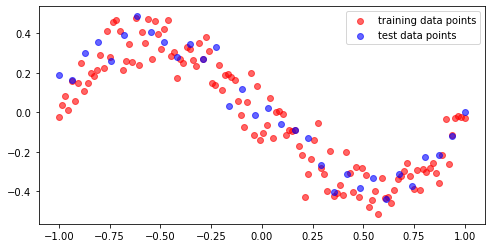

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(x,y,color='red',alpha=0.6, label='training data points')
plt.scatter(x_test,y_test,color='blue', alpha=0.6, label='test data points')
plt.legend()
plt.show

Try to fit a decision tree with max depth = 1

In [7]:
regressor_d1 = DecisionTreeRegressor(max_depth=1)
regressor_d1.fit(x,y)

DecisionTreeRegressor(max_depth=1)

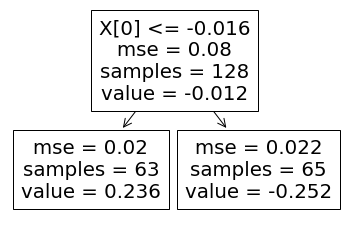

In [8]:
plot_tree(regressor_d1)
plt.show()

Visualize the built tree. Here we split on $x[0] == -0.016$, we get two different regions with two different means.

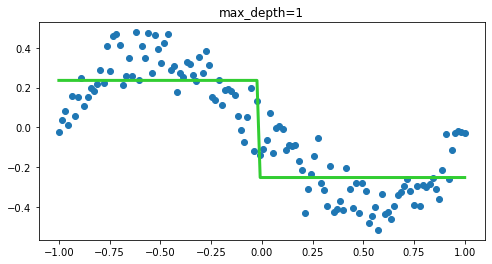

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.plot(x, regressor_d1.predict(x), color="limegreen", linewidth=3)
plt.title("max_depth=1")
plt.show()

<div class="alert alert-block alert-danger">
Try to fit a decision tree with max depth = 2
</div>

In [8]:
''' TO DO '''

DecisionTreeRegressor(max_depth=2)

<div class="alert alert-block alert-danger">
Plot the decision tree. Here we have three splits and four regions.
</div>

In [10]:
''' TO DO '''

' TO DO '

<div class="alert alert-block alert-danger">
Plot a tree like visualization.
</div>

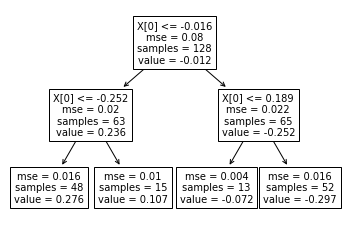

In [10]:
plot_tree(regressor_d2)
plt.show()

Notice how we have *four leaves associated with the different regions*. Each leave shows the loss (mse = Mean squared error), the number of samples in that region, and the mean which is returned for all data points in that region. The splits are done on X[0], this means the first feature (which is x cause we only have one)

<div class="alert alert-block alert-danger">
Try to fit a decision tree with max depth = 20
</div>

In [12]:
''' TO DO '''

' TO DO '

<div class="alert alert-block alert-danger">
Visualize the tree. Notice how this trees is already overfitting (wiggle wiggle to each point)
</div>

In [13]:
''' TO DO '''

' TO DO '

Did you observe **overfitting ?**

<div class="alert alert-block alert-danger">
Lets see how the error is changing when we change the depth of the trees. Try to vary max_depth from 1 to 20, record the training and test errors.
</div>

In [15]:
MAX_DEPTH = 20
history_training = []
history_test = []
for depth in range(1, MAX_DEPTH+1):
    ''' TO DO '''
    # create a decision tree with max_depth=depth
    # fit the decision tree
    # evaluate te mse error on training set and test set
    
    # store the history of error
    history_training.append(training_regression_error)
    history_test.append(test_regression_error)

<div class="alert alert-block alert-danger">
Plot training and test error. We can see how our tree starts to overfit the training data starting from depth = 3. The training error continues decreasing until 0 while test error starts increasing. 
</div>

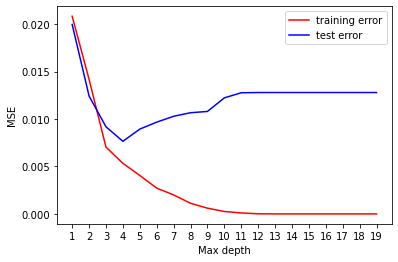

In [14]:
''' TO DO '''

It is very easy to over-train the model with decision trees.
<div class="alert alert-block alert-danger">
What is the best max_depth for this dataset ?
</div>

## Classification decision trees

We will be working on Pima Indians Diabetes Database. The objective is to predict based on diagnostic measurements whether a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

Features are:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1, i.e does not or does have diabetes)

The data is not perfect, some values are out of range (blood pressure = 0 or skin thickness = 0), but we will not wory about that here. Feel free to play with the data.

Import the dataset into a pandas dataframe.

In [16]:
pima = pd.read_csv('https://www.i3s.unice.fr/~riveill/dataset/diabetes.csv')
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We split the data set into training data (80%) and test data (20%).

In [17]:
X_train, X_test, y_train, y_test = train_test_split(pima.iloc[:, :-1], pima.Outcome, test_size=0.2, random_state=RAND_STATE)

<div class="alert alert-block alert-danger">
Try to vary trees depth (between 1 to 20) and record :

* create a decision tree with the suitable max_depth
* evaluate the mean cross validation error (10 folds cv) using cross_val_score on training set,
* then, evaluate the training error and test error.

We record the test error just to show how cross validation error can be used to estimate test error (which is not accessible in practice).
</div>

In [17]:
MAX_DEPTH = 20
cv_history = []
test_history = []
train_history = []
for depth in range(1, MAX_DEPTH+1):
    ''' to do '''


<div class="alert alert-block alert-danger">
Plot test, cross validation and training errors in order to eee how cross validation errors correlates with test errors.
</div>

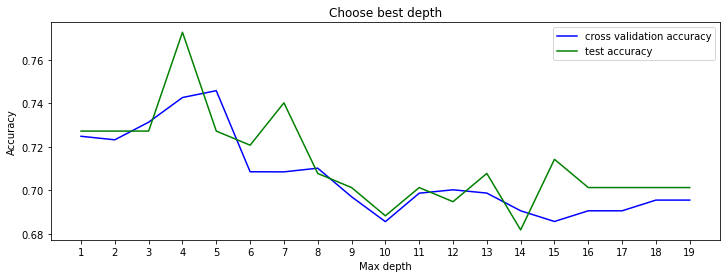

In [18]:
''' TO DO '''

For me CV gives depth=5 as the best parameter while it's 4 in test data which is not very different.
    
Here also, we notice that our model starts overfitting data when depth increases above 5.

<div class="alert alert-block alert-danger">
Fit a decision tree using your best depth
</div

In [19]:
''' TO DO '''

' TO DO '

Using the tree structure we can compute the importance of each one of the features. Intuitively a feature's importance is it's contribution in reducing the impurity of different nodes in the tree. 

Sort and plot features with respect to thier importance (which we get by retrieving the attribute clf.feature_importances_).

**Recall:** the sorted function returns a list sorted in the ascending direction.

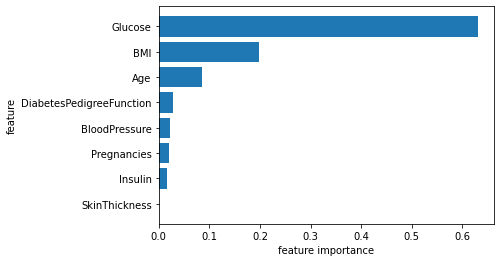

In [24]:
sorted_features = sorted(zip(pima.columns[:-1, ], clf.feature_importances_), key= lambda couple: couple[1])
features, scores = zip(*sorted_features)

plt.barh(range(len(features)), scores, align='center')
plt.yticks(range(len(features)),features)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

Apparently Clucose levels, BMI (body mass index) and age are important factors for diabetes.

## Classification with random forests

<div class="alert alert-block alert-danger">
Using to 1 to 400 trees, try a random forest on the Pima Indians Diabetes dataset.
Record how test and training errors change with the number of trees.
    
Then plot the accuracy for your best decision tree and for the train and test accuracy for each random forest.
    
What is your observation.
</div>

In [41]:
''' TO DO '''

For me, random forest are much less prone to overfitting than decision tree. Did you have the same observation ?

## Use Random Forest by yourself

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric**

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Dataset description**

This is a dataset with many features whose truth cannot be known for the test set.

We will use only the following features
: ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'Bedroom', 'TotRmsAbvGrd']
* LotArea: Lot size in square feet
* YearBuilt: Original construction date
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* FullBath: Full bathrooms above grade
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

We will build the train and validation set from the available data

In [25]:
# Read dataset
target = ['SalePrice']
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
url = "https://www.i3s.unice.fr/~riveill/dataset/"

home_data = pd.read_csv(url+"iowa.csv")

X = home_data[features]
y = home_data[target]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 1: Use a Decision Tree

<div class="alert alert-block alert-danger">
**Preliminary Questions**

* Do we need to prepare the data?
     * i.e. One hot encode the categorical data
     * i.e. Normalize the numerical data

* Is the model sensitive to outliers?
    * If so, we need to know if the dataset contains outliers and eliminate them

* What does RMSE mean? How is this metric calculated?
    * Is this metric relevant for this problem?

* What are the main hyper-parameters of this model
</div>

<div class="alert alert-block alert-danger">
Create, fit, predict and evaluate a Decision Tree
</div>

<div class="alert alert-block alert-danger">
Find best value for max_leaf_nodes in order to minimise RMSE
</div>

### Step 2: Use a Random Forest

<div class="alert alert-block alert-danger">
Do the same with random forest
Find best hyperparameter using RandomizedSearchCV
</div>

## Ensemble model

<div class="alert alert-block alert-danger">
**BONUS PART**
</div

* Zhao, Y., Wang, X., Cheng, C. and Ding, X., 2020. [Combining Machine Learning Models and Scores using combo library]([http://www.andrew.cmu.edu/user/yuezhao2/papers/20-aaai-combo.pdf]. Thirty-Fourth AAAI Conference on Artificial Intelligence. 
* Combo installation: https://pypi.org/project/combo/#installation

In [42]:
''' PRELIMINARY ''';
#install combo
#!pip install combo
#https://pycombo.readthedocs.io/en/latest/example.html

In [43]:
''' Load some metrics and sklearn models'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

In [44]:
''' Load some combo ensemble aggregator '''
from combo.models.classifier_comb import SimpleClassifierAggregator
from combo.models.classifier_stacking import Stacking
from combo.models.classifier_dcs import DCS_LA
from combo.models.classifier_des import DES_LA

### Create a dataset

In [45]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

def build_dataset(n_samples, ratio, blob=False):
    n_class0 = int(ratio * n_samples)
    
    n_class1 = n_samples - n_class0
    
    if blob:
        X, y = make_blobs(n_samples=[n_class0, n_class1], n_features=2,
                          centers=[[-1,-1],[1,1]], cluster_std=[0.5, 1], random_state=RAND_STATE)
    else:
        # Generate class 0
        offset = 4
        Xa = 0.3 * np.random.randn(n_class1 // 2, 2) - offset
        Xb = 0.3 * np.random.randn(n_class1 // 2, 2) + offset
        X0 = np.r_[Xa, Xb]
        
        # Add class 1
        X1 = np.random.uniform(low=-6, high=6, size=(n_class0, 2))
        
        # Concatenate the two classes
        X = np.r_[X0,X1]
        y = [0]*len(X0) + [1]*len(X1)
    
    return X, y

In [46]:
def plot_dataset(name, X_train, X_test, y_train, y_test):
    X0_train = np.array([x for x, y in zip(X_train, y_train) if y==0]).reshape((-1, 2))
    X1_train = np.array([x for x, y in zip(X_train, y_train) if y==1]).reshape((-1, 2))
    X0_test = np.array([x for x, y in zip(X_test, y_test) if y==0]).reshape((-1, 2))
    X1_test = np.array([x for x, y in zip(X_test, y_test) if y==1]).reshape((-1, 2))


    plt.figure(figsize=(15, 12))
    plt.scatter(X0_train[:,0], X0_train[:,1], c='b', alpha=0.1, label=["classe 0"])
    plt.scatter(X1_train[:,0], X1_train[:,1], c='r', alpha=0.1, label=["classe 1"])
    plt.scatter(X0_test[:,0], X0_test[:,1], c='b')
    plt.scatter(X1_test[:,0], X1_test[:,1], c='r')

    plt.title(name)
    plt.legend()
    plt.show();

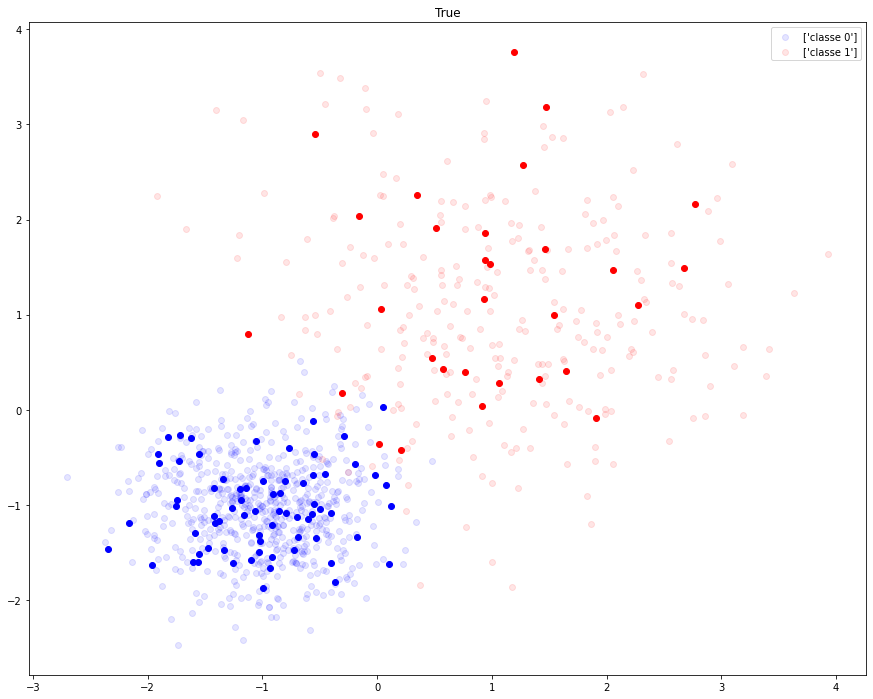

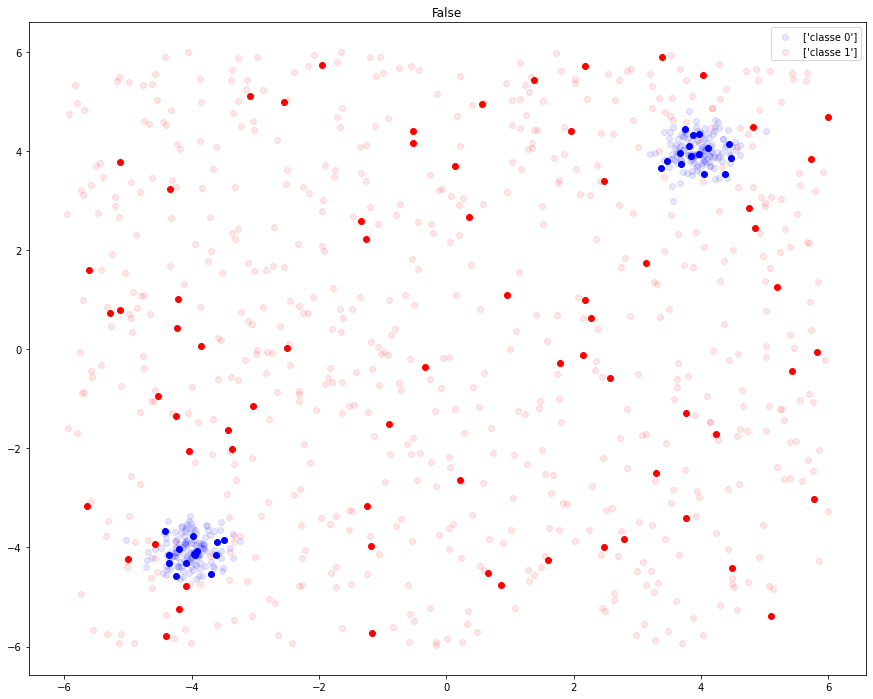

In [47]:
# Ratio between class 0 and 1
class0_fraction = 0.7
n_items = 1000

for dataset in [True, False]:
    # Build dataset
    X, y = build_dataset(n_items, class0_fraction, blob=dataset)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=RAND_STATE)

    # Plot dataset
    plot_dataset(dataset, X_train, X_test, y_train, y_test)

### Plot of decision boundaries for different models

In [49]:
# initialize a group of classifiers
classifiers = {
    'k Nearst Neighbors': KNeighborsClassifier(n_neighbors=1),
    'Gaussian NB': GaussianNB(),
    'Decision tree': DecisionTreeClassifier(max_depth=2,
                                            random_state=RAND_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=10,
                                            max_depth=2,
                                            random_state=RAND_STATE),
}

In [55]:
# Plot decision boundary
def plot_decision_boundary(classifiers, X_train, y_train, X_test, y_test):
    X0_test = np.array([x for x, y in zip(X_test, y_test) if y==0]).reshape((-1, 2))
    X1_test = np.array([x for x, y in zip(X_test, y_test) if y==1]).reshape((-1, 2))
    
    threshold = -0.5
    plt.figure(figsize=(5*3, 5*((len(classifiers)-1)//3+1)))
    xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))

    scores = dict()
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the model
        clf.fit(X_train, y_train)
    
        # predict
        y_pred = clf.predict(X_test)
    
        # evaluate
        y_pred = clf.predict(X_test)
        # accuracy --> proportion d'éléments bien classé
        ACC = accuracy_score(y_test, y_pred)
        # Average=binary --> On s'intéresse qu'à la classe 1
        P, R, F1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        n_errors = sum(y_test!=y_pred)
        scores[clf_name] = [ACC, P, R, F1, n_errors]
        print("{:25s}: {:.2f} {:.2f} {:.2f} {:.2f} {: 3d}".format(clf_name[:25], ACC, P, R, F1, n_errors))
    
        # plot the levels lines and the points
        if clf_name=="Perceptron":
            a = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.array([1/(1+np.exp(-b)) for b in a]) * -1
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] * -1
        Z = Z.reshape(xx.shape)
    
        subplot = plt.subplot(len(classifiers)//3+1, 3, i+1)

        if Z.min()<threshold:
            subplot.contourf(xx, yy, Z,
                     levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
    
        if threshold<=Z.max():
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
        b = subplot.scatter(X0_test[:,0], X0_test[:,1], c='b', s=20, edgecolor='k')
        c = subplot.scatter(X1_test[:,0], X1_test[:,1], c='r', s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
                [a.collections[0], b, c],
                ['learned boundary', 'class 0', 'class 1'],
                prop=font_manager.FontProperties(size=10),
                loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
        plt.suptitle("Model Combination")
    # plt.savefig('compare_selected_classifiers.png', dpi=300)
    plt.show()
    return scores

k Nearst Neighbors       : 0.97 0.97 0.99 0.98   3
Gaussian NB              : 0.70 0.70 1.00 0.82  30
Decision tree            : 0.80 1.00 0.71 0.83  20
Random Forest            : 0.80 0.81 0.93 0.87  20


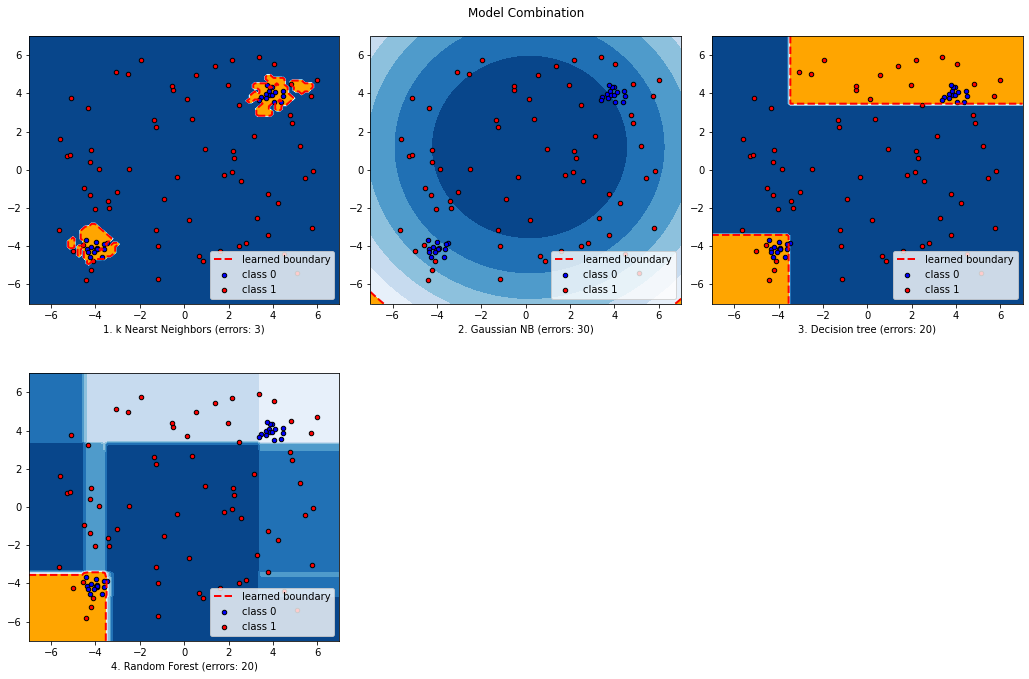

In [58]:
_ = plot_decision_boundary(classifiers, X_train, y_train, X_test, y_test)

### Use combo to create some basic ensemble model

#### Classical ensemble model

combine by averaging     : 0.97 0.97 0.99 0.98   3
combine by maximization  : 0.70 0.70 1.00 0.82  30
combine by majority vote : 0.97 0.97 0.99 0.98   3
combine by median        : 0.97 0.97 0.99 0.98   3


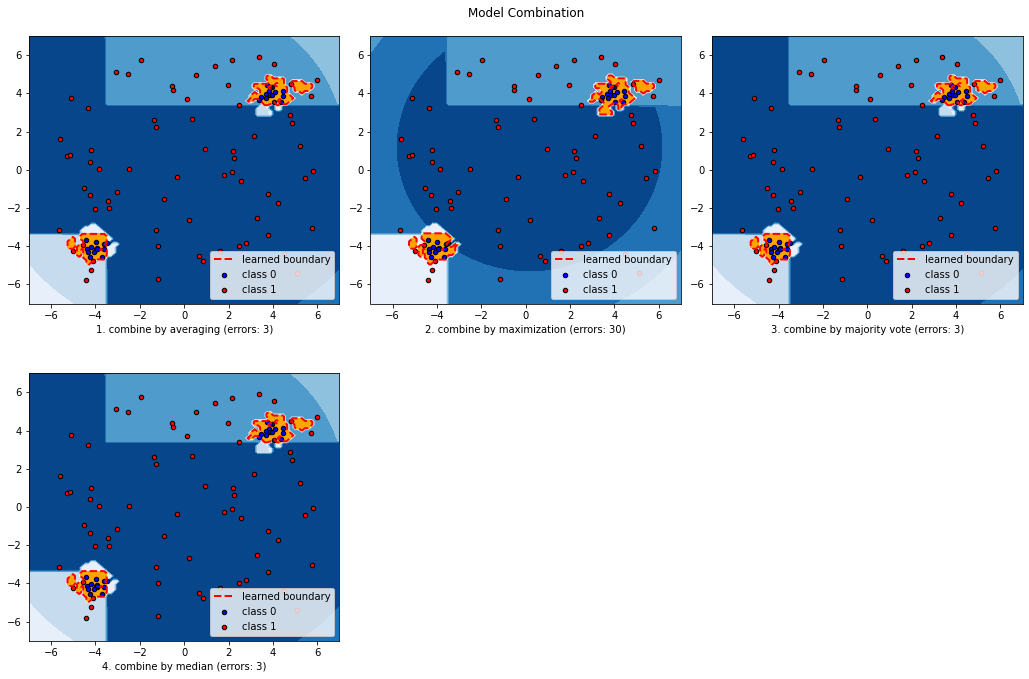

In [59]:
classifier_list = [clf for (_, clf) in classifiers.items()][:3]

classifiers_ = {
    'combine by averaging': SimpleClassifierAggregator(classifier_list,
                                 method='average'),
    'combine by maximization': SimpleClassifierAggregator(classifier_list,
                                 method='maximization'),
    'combine by majority vote': SimpleClassifierAggregator(classifier_list, 
                                 method='majority_vote'),
    'combine by median': SimpleClassifierAggregator(classifier_list,method='median')
}

_ = plot_decision_boundary(classifiers_, X_train, y_train, X_test, y_test)

#### Weighted ensemble model

[[1.875  0.1875 0.9375]]
[[1.875  0.1875 0.9375]]
combine by weighted avera: 0.97 0.97 0.99 0.98   3
combine by weighted major: 0.97 0.97 0.99 0.98   3


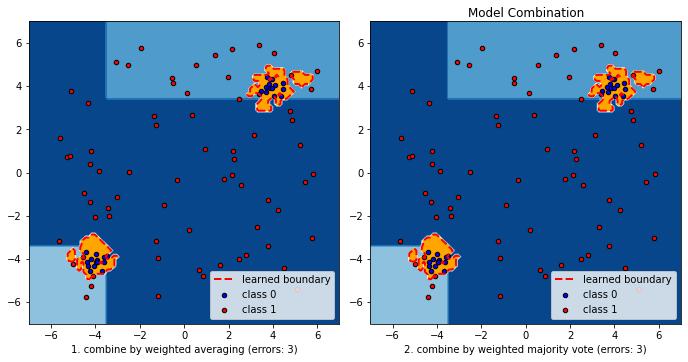

In [60]:
classifier_list = [clf for (_, clf) in classifiers.items()][:3]

clf_weights = np.array([10, 1, 5])
assert len(classifier_list)==len(clf_weights)

classifiers_ = {
    'combine by weighted averaging': SimpleClassifierAggregator(classifier_list,
                                 method='average', weights=clf_weights),
    'combine by weighted majority vote': SimpleClassifierAggregator(classifier_list, 
                                 method='majority_vote', weights=clf_weights),
}

_ = plot_decision_boundary(classifiers_, X_train, y_train, X_test, y_test)

### Use Combo to create mode sophisticated model

#### Stacking Ensemble Machine Learning With Python

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

Stacking or Stacked Generalization is an ensemble machine learning algorithm.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

![Stacking](https://blogs.sas.com/content/subconsciousmusings/files/2017/05/modelstacking.png)

#### Dynamic Model Selection (DES) for Classification in Python

* DCS :Dynamic Classifier Selection

    * --> On recherche le modèle le plus pertinent pour les données à prédire

    * Dynamic classifier selection is a type of ensemble learning algorithm for classification predictive modeling.

    * The technique involves fitting multiple machine learning models on the training dataset, then selecting the model that is expected to perform best when making a prediction, based on the specific details of the example to be predicted.

    * This can be achieved using a k-nearest neighbor model to locate examples in the training dataset that are closest to the new example to be predicted, evaluating all models in the pool on this neighborhood and using the model that performs the best on the neighborhood to make a prediction for the new example.

* DES :  Dynamic Ensemble Selection (https://machinelearningmastery.com/dynamic-ensemble-selection-in-python/)

    * --> On recherche le sous ensemble de modèles le plus pertinent pour les données à prédire

    * Dynamic ensemble selection is an ensemble learning technique that automatically selects a subset of ensemble members just-in-time when making a prediction.

    * The technique involves fitting multiple machine learning models on the training dataset, then selecting the models that are expected to perform best when making a prediction for a specific new example, based on the details of the example to be predicted.

![Dynamic Model Selection](https://ars.els-cdn.com/content/image/1-s2.0-S1566253517304074-gr3.jpg)

Stacking                 : 0.97 0.97 0.99 0.98   3
Stacking_RF              : 0.98 0.99 0.99 0.99   2
DCS_LA                   : 0.97 0.97 0.99 0.98   3
DES_LA                   : 0.97 0.97 0.99 0.98   3


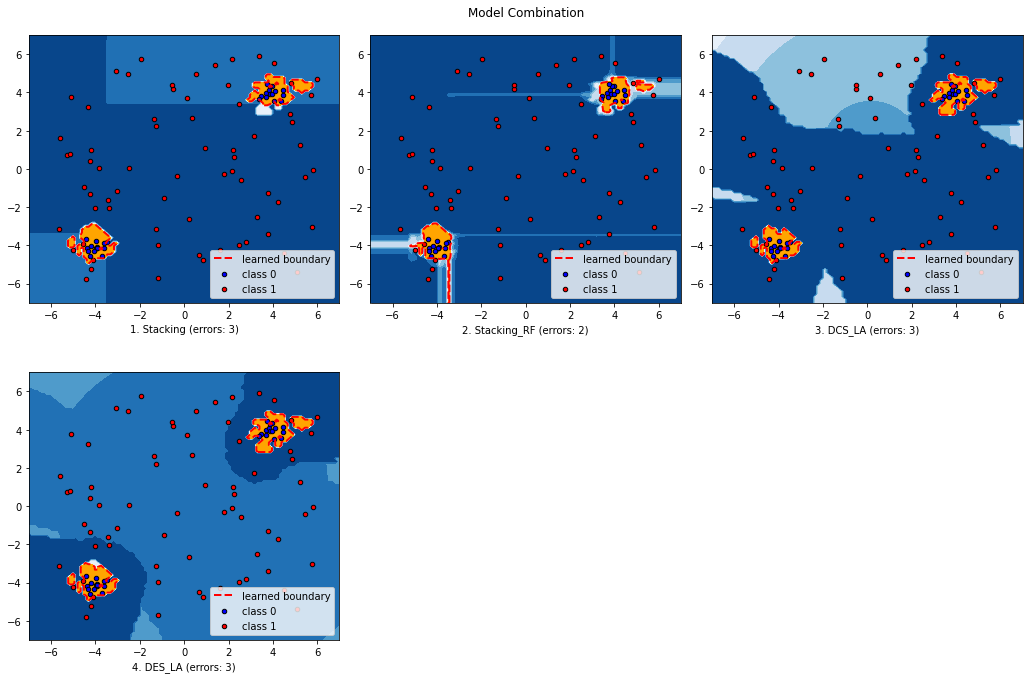

In [62]:
classifier_list = [clf for (_, clf) in classifiers.items()][:3] # On élimine les RF

classifiers_ = {
    'Stacking': Stacking(base_estimators=classifier_list,
                         shuffle_data=True),
    'Stacking_RF': Stacking(base_estimators=classifier_list,
                            shuffle_data=True,
                            meta_clf=RandomForestClassifier(random_state=RAND_STATE)),

    'DCS_LA': DCS_LA(base_estimators=classifier_list), # Data Classifier Selection by Local Accuracy
    'DES_LA': DES_LA(base_estimators=classifier_list), # Dynamic Ensemble Selection by Local Accuracy
}

_ = plot_decision_boundary(classifiers_, X_train, y_train, X_test, y_test)